In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

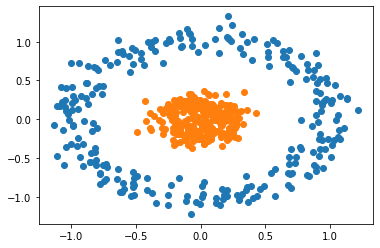

In [37]:
np.random.seed(0)
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [38]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [39]:
h = model.fit(x=X, y=y, verbose=1, batch_size = 20, epochs=100, shuffle=True)

Epoch 1/100
500/500 [==============================] - 0s 351us/step - loss: 0.6959 - accuracy: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 72us/step - loss: 0.6937 - accuracy: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 87us/step - loss: 0.6925 - accuracy: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 81us/step - loss: 0.6916 - accuracy: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 84us/step - loss: 0.6905 - accuracy: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 79us/step - loss: 0.6890 - accuracy: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 62us/step - loss: 0.6865 - accuracy: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 94us/step - loss: 0.6838 - accuracy: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 84us/step - loss: 0.6796 - accuracy: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 75us/step - loss: 0.67

500/500 [==============================] - 0s 64us/step - loss: 0.0347 - accuracy: 0.9980
Epoch 81/100
500/500 [==============================] - 0s 56us/step - loss: 0.0340 - accuracy: 0.9980
Epoch 82/100
500/500 [==============================] - 0s 64us/step - loss: 0.0329 - accuracy: 0.9980
Epoch 83/100
500/500 [==============================] - 0s 68us/step - loss: 0.0321 - accuracy: 0.9980
Epoch 84/100
500/500 [==============================] - 0s 60us/step - loss: 0.0312 - accuracy: 0.9980
Epoch 85/100
500/500 [==============================] - 0s 64us/step - loss: 0.0305 - accuracy: 0.9980
Epoch 86/100
500/500 [==============================] - 0s 60us/step - loss: 0.0297 - accuracy: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 66us/step - loss: 0.0290 - accuracy: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 56us/step - loss: 0.0283 - accuracy: 1.0000
Epoch 89/100
500/500 [==============================] - 0s 62us/step - loss: 0.0277 - 

Text(0.5, 1.0, 'accuracy')

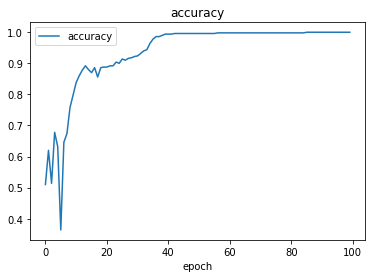

In [40]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

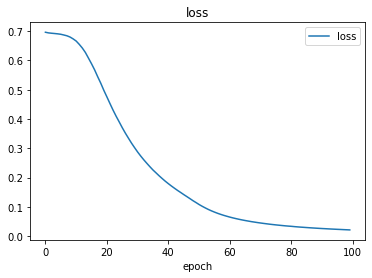

In [41]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [42]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

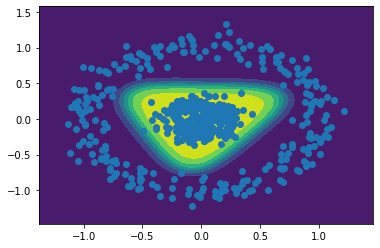

In [43]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

Prediction is: 1.0


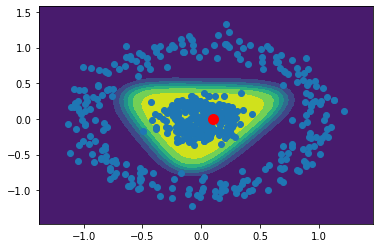

In [44]:
# Classify individual points
# Inside Circle = 1
# Outside Circle = 0
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print('Prediction is:', prediction.round().item())